In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.datasets import load_breast_cancer

In [15]:
X, y = make_classification(n_samples=100, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

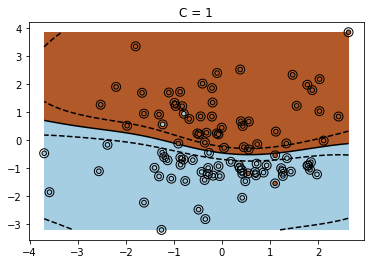

In [16]:
plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
          edgecolor='k', s=20)

# Circle out the test data
plt.scatter(X[:, 0], X[:, 1], s=80, facecolors='none',
          zorder=10, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
          linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title("C = {}".format(c))
plt.show()

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'])

In [8]:
X_train.shape

(426, 30)

In [5]:
C = [0.0001, 0.001, 0.01, 0.1, 1]
accuracy = []

for c in C:
   clf = svm.SVC(kernel='rbf', C = c)
   clf.fit(X_train, y_train)

   predict = clf.predict(X_test)
   accuracy.append(accuracy_score(predict, y_test))

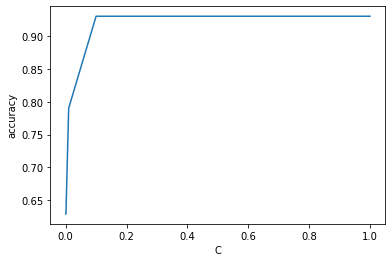

In [7]:
plt.plot(C, accuracy)
plt.xlabel("C")
plt.ylabel("accuracy")
plt.show()

In [6]:
accuracy

[0.6293706293706294,
 0.6293706293706294,
 0.7902097902097902,
 0.9300699300699301,
 0.9300699300699301]